## Questão 1.

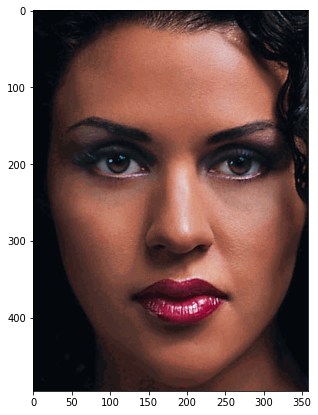

In [1]:
#Importando as bibliotecas
import time
import numpy
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11,7) #Definir o tamanho da imagem que vai aparecer na tela

#Lendo e mostrando a imagem
imagem = cv2.imread('images/Woman.png', cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
#Função que transforma RGB para YIQ
def rgb2yiq(r,g,b):
  y = []
  i = []
  q = []

  # percorrendo cada canal e aplicando a formula de conversão na matriz
  for j in range(len(r)):
    y.append(((0.299 * r[j]) + ( 0.587 * g[j]) + ( 0.114 * b[j])))
    i.append(((0.596 * r[j]) + (-0.274 * g[j]) + (-0.322 * b[j])))
    q.append(((0.211 * r[j]) + (-0.523 * g[j]) + ( 0.312 * b[j])))

  return (y,i,q)

In [3]:
#Transforma de YIQ para RGB
def yiq2bgr(y,i,q):
  r = []
  g = []
  b = []

  #percorrendo cada canal e aplicando a formula de conversão na matriz
  for j in range(len(y)):
    r.append(((1 * y[j]) + ( 0.956 * i[j]) + ( 0.621 * q[j])))
    g.append(((1 * y[j]) + (-0.272 * i[j]) + (-0.674 * q[j])))
    b.append(((1 * y[j]) + (-1.106 * i[j]) + ( 1.703 * q[j])))

  return (r,g,b)

### RGB to YIQ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


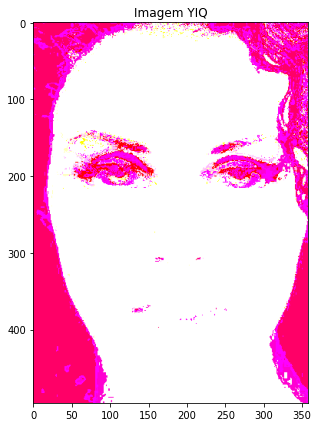

In [4]:
#Separando os canais da imagem
#OBS.: o opencv lê a imagem em BGR e não RGB, por isso o canal 0 é o azul e o canal 2 é o vermelho
# canal azul
b = imagem[:,:,0] 
# canal verde
g = imagem[:,:,1]  
# canal vermelho
r = imagem[:,:,2]

vetor_yiq = rgb2yiq(r,g,b)

#Salvando valores retornados pela função
q = numpy.array(vetor_yiq[0])
i = numpy.array(vetor_yiq[1])
y = numpy.array(vetor_yiq[2])

#Criando imagem YIQ
image_yiq = []
image_yiq.append(q)
image_yiq.append(i)
image_yiq.append(y)
image_yiq = numpy.array(image_yiq)

#Invertendo a ordem do shape da imagem
image_yiq = numpy.moveaxis(image_yiq, 0, 2)
#Mostrando a imgem convertida
plt.title("Imagem YIQ")
plt.imshow(image_yiq)
plt.show()

### YIQ to RGB

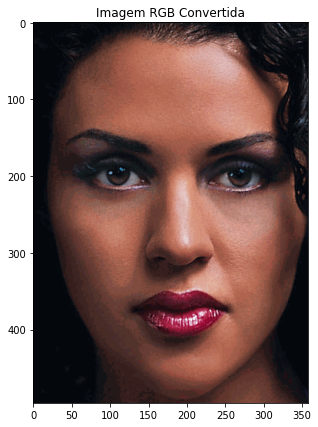

In [5]:
#transformando de volta para RGB
RGB2 = []

#Percorrendo a imagem YIQ
for linha in image_yiq:    
    vetor = []
    for yiq in linha:
        y = yiq[0]
        i = yiq[1]
        q = yiq[2]

        #Cálculo da Conversão de YIQ para RGB
        r = (1.000 * y) + ( 0.956 * i) + ( 0.621 * q)
        g = (1.000 * y) + (-0.272 * i) + (-0.647 * q)
        b = (1.000 * y) + (-1.106 * i) + ( 1.703 * q)
        
        #Verificando o valor máximo
        if r > 255: 
            r = 255
        if g > 255:
            g = 255
        if b > 255:
            b = 255
        #Verificando o valor mínimo
        if r < 0.0:
            r = 0.0
        if g < 0.0:
            g = 0.0
        if b < 0.0:
            b = 0.0
        
        #Arredondando os valores de RGB
        r = int(round(r))
        g = int(round(g))
        b = int(round(b))
        yiq2 = (r,g,b)
        vetor.append(yiq2)
    RGB2.append(vetor)
    
#Mostrando imagem RGB final
plt.title("Imagem RGB Convertida")
plt.imshow(RGB2)
plt.show()

## Questão 2.

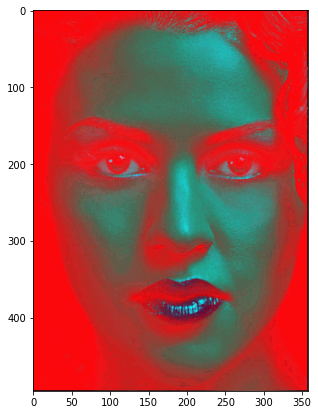

In [6]:
def negative(img, channel): 
    copy = img.copy() #criando cópia da imagem original
    height, width, _ = copy.shape #salvando a altura e largura da imagem
    
    #percorrendo a imagem e aplicando a fórmula do filtro negativo de acordo com a flag recebida
    for i in range(0, height - 1): 
        for j in range(0, width - 1): 

            pixel = copy[i, j] 

            if channel == 'r' or channel == 'all':
                pixel[0] = 255 - pixel[0] 
            if channel == 'g' or channel == 'all':
                pixel[1] = 255 - pixel[1] 
            if channel == 'b' or channel == 'all' or channel == 'y':
                pixel[2] = 255 - pixel[2] 

            copy[i, j] = pixel 
            
    return copy

plt.imshow(negative(numpy.copy(RGB2), 'r')) 
plt.show() 

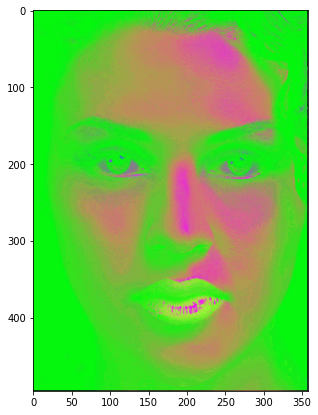

In [7]:
plt.imshow(negative(numpy.copy(RGB2), 'g')) 
plt.show() 

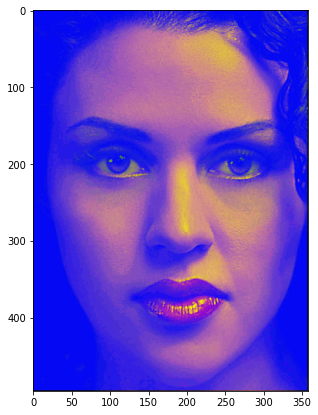

In [8]:
plt.imshow(negative(numpy.copy(RGB2), 'b')) 
plt.show() 

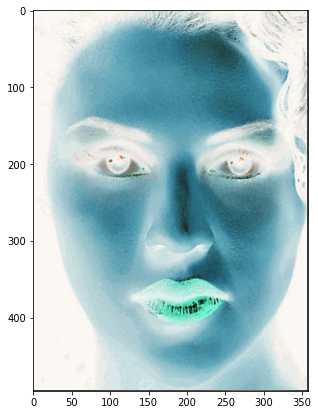

In [9]:
plt.imshow(negative(numpy.copy(RGB2), 'all')) 
plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


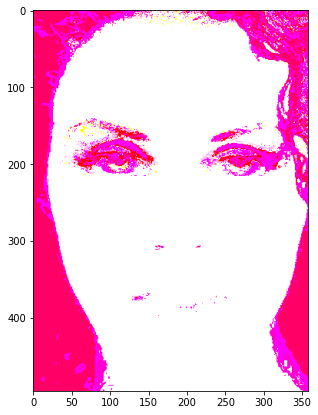

In [10]:
def negativeyiq(img, channel): 
    copy = img.copy()
    height, width, _ = copy.shape 
    for i in range(0, height - 1): 
        for j in range(0, width - 1): 

            pixel = copy[i, j] 
            pixel[0] = 255 - pixel[0] 

            copy[i, j] = pixel 
            
    return copy

yiq_negative = negativeyiq(numpy.copy(image_yiq), 'y')
plt.imshow(yiq_negative) 
plt.show() 

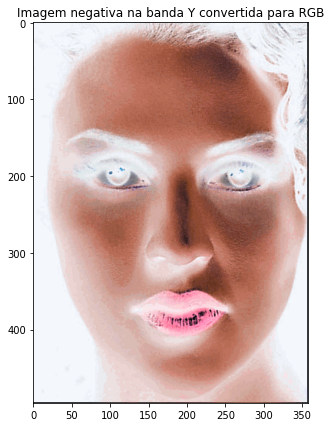

In [11]:
#transformando de volta para RGB
RGB3 = []

#Percorrendo a imagem YIQ com filtro negativo em Y
for linha in yiq_negative:    
    vetor = []
    for yiq in linha:
        y = yiq[0]
        i = yiq[1]
        q = yiq[2]

        #Cálculo da Conversão de YIQ para RGB
        r = (1.000 * y) + ( 0.956 * i) + ( 0.621 * q)
        g = (1.000 * y) + (-0.272 * i) + (-0.647 * q)
        b = (1.000 * y) + (-1.106 * i) + ( 1.703 * q)
        
        #Verificando o valor máximo
        if r > 255: 
            r = 255
        if g > 255:
            g = 255
        if b > 255:
            b = 255
        #Verificando o valor mínimo
        if r < 0.0:
            r = 0.0
        if g < 0.0:
            g = 0.0
        if b < 0.0:
            b = 0.0
        
        #Arredondando os valores de RGB
        r = int(round(r))
        g = int(round(g))
        b = int(round(b))
        yiq2 = (r,g,b)
        vetor.append(yiq2)
    RGB3.append(vetor)

#Mostrando imagem RGB final
plt.title("Imagem negativa na banda Y convertida para RGB")
plt.imshow(RGB3)
plt.show()

## Questão 3
## Correlação em imagem RGB

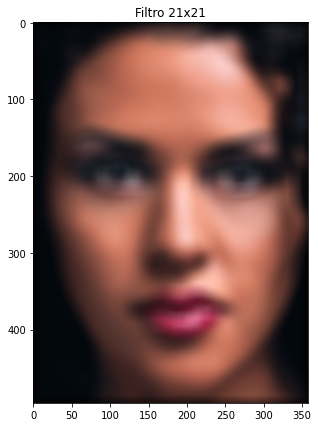

In [12]:
def expansao_por_histrograma(img, L):
    old_img = numpy.copy(img)
    new_img = numpy.ndarray(old_img.shape)
    r_min = numpy.min(old_img)
    r_max = numpy.max(old_img)
    fator = (L-1)/(r_max-r_min)
    
    new_img[:,:,:] = (old_img[:,:,:] - r_min) * fator
    
    return new_img.astype(int)

def gera_filtro_do_txt(nome_arquivo):
    m = []
    arquivo = open(nome_arquivo, "r")
    linhas = [l.split(" ") for l in arquivo.readlines()]
    for l in linhas:
        m.append([float(el.rstrip()) for el in l if len(el) > 1])
    return m

def aplica_extensao_0(img, m, n):
    pivo = int((max(m, n))/2)
    linha0 = [[0,0,0]]*(len(img[0])+(2*pivo))
    linhas = []
    for l in img:
        l_0 = [[0,0,0]]*(pivo)
        linhas.append(l_0+l+l_0)
    img = ([linha0]*pivo) + linhas + ([linha0]*pivo)
    return img

def correlacao(h, m, n, img, pixel_atual, offset):
    i, j = pixel_atual
    
    pivoI = int((m-1)/2)
    pivo_descerI = pivoI + 1 - m%2

    pivoJ = int((n-1)/2)
    pivo_descerJ = pivoJ + 1 - n%2
    
    i += pivoI
    j += pivoJ
    new_pixel = [0, 0, 0]
    
    new_pixel[0] = round(numpy.multiply(h, img[i-pivoI:i+pivo_descerI+1, j-pivoJ:j+pivo_descerJ+1, 0]).sum()) + offset
    new_pixel[1] = round(numpy.multiply(h, img[i-pivoI:i+pivo_descerI+1, j-pivoJ:j+pivo_descerJ+1, 1]).sum()) + offset
    new_pixel[2] = round(numpy.multiply(h, img[i-pivoI:i+pivo_descerI+1, j-pivoJ:j+pivo_descerJ+1, 2]).sum()) + offset
    return new_pixel

def aplica_correlacao(mask, img):
    mask_m, mask_n = numpy.copy(mask).shape
    m_ext = numpy.copy(aplica_extensao_0(img, mask_m, mask_n))
    new_img = numpy.copy(img)
    h, w, _ = new_img.shape
    for i in range(0, h):
        for j in range(0, w):
            new_img[i, j] = correlacao(mask, mask_m, mask_n, m_ext, (i, j), 0)     
    return numpy.abs(new_img).tolist()

h21x21 = gera_filtro_do_txt("filtro_media21x21.txt")
img21x21 = expansao_por_histrograma(aplica_correlacao(h21x21, RGB2), 256)
plt.title("Filtro 21x21")
plt.imshow(img21x21)
plt.show()

[[1.0, 0.0, -1.0], [1.0, 0.0, -1.0], [1.0, 0.0, -1.0]]


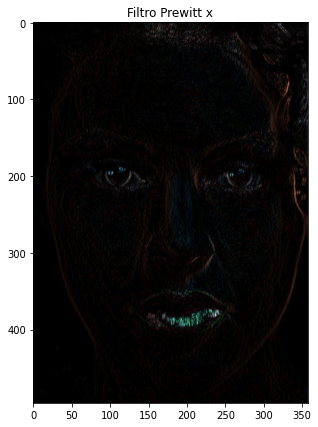

In [13]:
h_prewitt_x = gera_filtro_do_txt("prewitt_x.txt")
print(h_prewitt_x)
img_prewitt_x = expansao_por_histrograma(aplica_correlacao(h_prewitt_x, RGB2), 256)
plt.title("Filtro Prewitt x")
plt.imshow(img_prewitt_x)
plt.show()

[[1.0, 1.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -1.0, -1.0]]


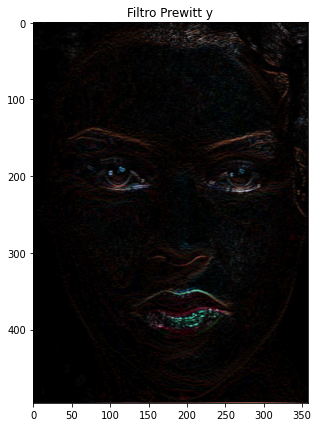

In [14]:
h_prewitt_y = gera_filtro_do_txt("prewitt_y.txt")
print(h_prewitt_y)
img_prewitt_y = expansao_por_histrograma(aplica_correlacao(h_prewitt_y, RGB2), 256)
plt.title("Filtro Prewitt y")
plt.imshow(img_prewitt_y)
plt.show()

[[-2.0, -1.0, 0.0], [-1.0, 1.0, 1.0], [0.0, 1.0, 2.0]]


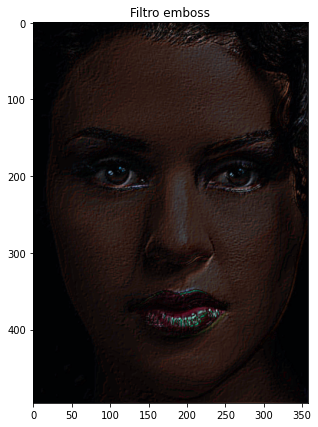

In [15]:
h_emboss = gera_filtro_do_txt("emboss.txt")
print(h_emboss)
img_emboss = expansao_por_histrograma(aplica_correlacao(h_emboss, RGB2), 256)
plt.title("Filtro emboss")
plt.imshow(img_emboss)
plt.show()

## Questão 4.
## Filtro da média em imagem YIQ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tempo de processamento 21x21: 2.0192222595214844


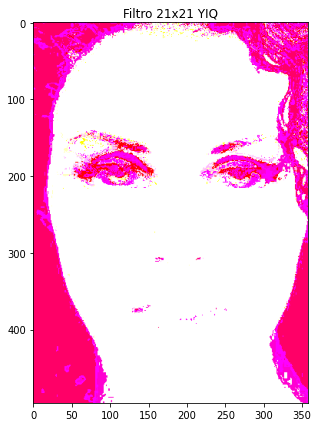

In [16]:
def aplicar_extensao_0(img, m, n):
    pivo = int((max(m, n)-1)/2)
    linha0 = [[0,0,0]]*(len(img[0])+(2*pivo))
    linhas = []
    for l in img:
        l_0 = [[0,0,0]]*(pivo)
        linhas.append(l_0+l+l_0)
    img = ([linha0]*pivo) + linhas + ([linha0]*pivo)
    return img

def media_filtro(m, n, img, pixel_atual):
    razao = 1/(m*n)
    i, j = pixel_atual
    
    pivoI = int((m-1)/2)
    pivo_descerI = pivoI + 1 - m%2

    pivoJ = int((n-1)/2)
    pivo_descerJ = pivoJ + 1 - n%2
    
    i += pivoI
    j += pivoJ
    new_pixel = [0, 0, 0]
    new_pixel[0] = round(razao*(img[i-pivoI:i+pivo_descerI+1, j-pivoJ:j+pivo_descerJ+1, 0].sum()))
    new_pixel[1] = img[i,j,1]
    new_pixel[2] = img[i,j,2]
    return new_pixel

def aplicar_filtro_media(img, m, n):
    m_ext = numpy.copy(aplicar_extensao_0(img, m, n))
    new_img = numpy.copy(img)
    h, w, _ = new_img.shape
    for i in range(0, h):
        for j in range(0, w):
            new_img[i, j] = media_filtro(m, n, m_ext, (i, j))     
    return new_img.tolist()

plt.title("Filtro 21x21 YIQ")
tempo_21x21_inicio = time.time()
yiq_media21x21 = aplicar_filtro_media(image_yiq.tolist(),21, 21) 
tempo_21x21_fim = time.time()
print("tempo de processamento 21x21:", (tempo_21x21_fim-tempo_21x21_inicio))
plt.imshow(yiq_media21x21)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


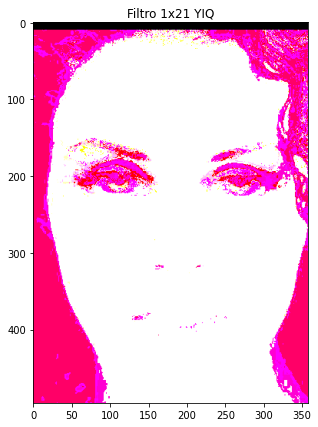

In [17]:
plt.title("Filtro 1x21 YIQ")
tempo_1x21_inicio = time.time()
yiq_media1x21 = aplicar_filtro_media(image_yiq.tolist(),1, 21) 
tempo_1x21_final = time.time()
tempo_1x21 = tempo_1x21_final - tempo_1x21_inicio
plt.imshow(yiq_media1x21)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


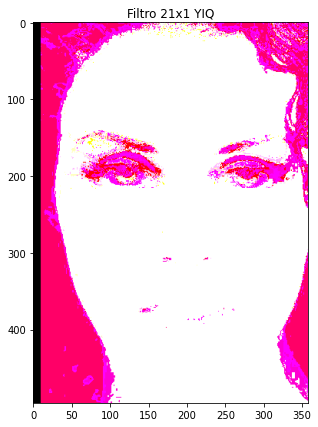

In [18]:
plt.title("Filtro 21x1 YIQ")
yiq_media21x1 = aplicar_filtro_media(image_yiq.tolist(),21, 1) 
plt.imshow(yiq_media21x1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tempo total: 4.0268635749816895


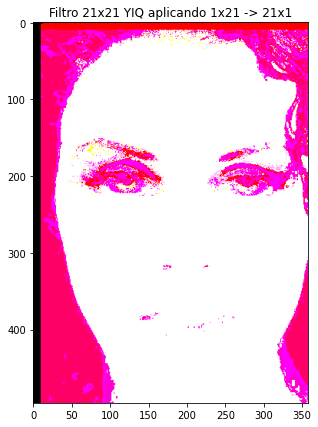

In [19]:
plt.title("Filtro 21x21 YIQ aplicando 1x21 -> 21x1")
tempo_21x1_inicio = time.time()
yiq_media_21x21 = aplicar_filtro_media(yiq_media1x21,21, 1) 
tempo_21x1_final = time.time()
tempo_21x1 = tempo_21x1_final - tempo_21x1_inicio
tempo_total = tempo_1x21 + tempo_21x1
print("tempo total:", tempo_total)
plt.imshow(yiq_media_21x21)
plt.show()

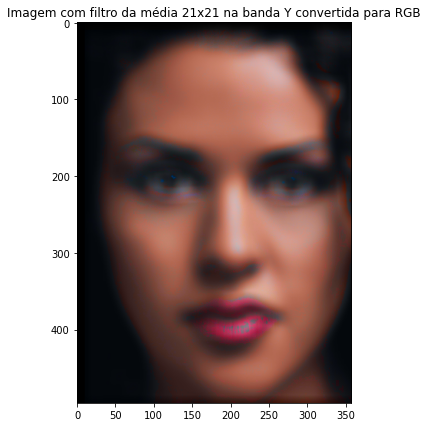

In [20]:
#transformando de volta para RGB
RGB4 = []

#Percorrendo a imagem YIQ com filtro negativo em Y
for linha in yiq_media_21x21:    
    vetor = []
    for yiq in linha:
        y = yiq[0]
        i = yiq[1]
        q = yiq[2]

        #Cálculo da Conversão de YIQ para RGB
        r = (1.000 * y) + ( 0.956 * i) + ( 0.621 * q)
        g = (1.000 * y) + (-0.272 * i) + (-0.647 * q)
        b = (1.000 * y) + (-1.106 * i) + ( 1.703 * q)
        
        #Verificando o valor máximo
        if r > 255: 
            r = 255
        if g > 255:
            g = 255
        if b > 255:
            b = 255
        #Verificando o valor mínimo
        if r < 0.0:
            r = 0.0
        if g < 0.0:
            g = 0.0
        if b < 0.0:
            b = 0.0
        
        #Arredondando os valores de RGB
        r = int(round(r))
        g = int(round(g))
        b = int(round(b))
        yiq2 = (r,g,b)
        vetor.append(yiq2)
    RGB4.append(vetor)

#Mostrando imagem RGB final
plt.title("Imagem com filtro da média 21x21 na banda Y convertida para RGB")
plt.imshow(RGB4)
plt.show()

## Qustão 5.

In [21]:
def mediana(n, m, imagem):

    h, w, canais = imagem.shape  #pegando os tamanhos da imagem: altura, largura e n° de canais
    filtroMediana = numpy.zeros_like(imagem) #criando matriz do tamanho da imagem original para armazenar a saida

    #iniciando extensão 
    colunas = int((m) / 2)
    linhas = int((n) / 2)
    matrizExt = numpy.zeros((h+2*colunas, w+2*linhas, canais)) #criando matriz extendida
    matrizExt[colunas:h+colunas, linhas:w+linhas] = imagem #preenchendo a matrix extendida com os valores da imagem original

    #percorrendo os pixels da imagem e calculando a mediana
    for y in range (colunas , h+colunas):
        for x in range (linhas , w +linhas):
            
            valoresY = matrizExt[y-colunas : y+colunas + 1, x-linhas : x+linhas + 1, 0]
            valoresI = matrizExt[y-colunas : y+colunas + 1, x-linhas : x+linhas + 1, 1]
            ValoresQ = matrizExt[y-colunas : y+colunas + 1, x-linhas : x+linhas + 1, 2]
          
            medianaY = int(numpy.median(valoresY))
            medianaI = int(numpy.median(valoresI))
            medianaQ = int(numpy.median(ValoresQ))
             
            #salvando pixel com mediana aplicado na matriz criada 
            filtroMediana[y -colunas,x -linhas,0] = medianaY
            filtroMediana[y -colunas,x -linhas,1] = medianaI
            filtroMediana[y -colunas,x -linhas,2] = medianaQ

    return filtroMediana
    
imagem_Mediana = mediana(21,21,image_yiq)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


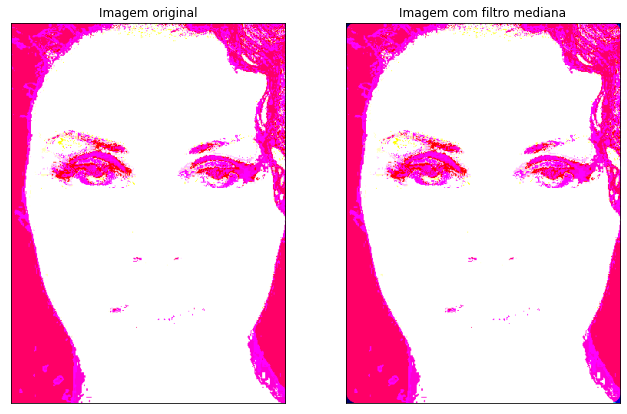

In [22]:
imagem_Mediana[:,:,1] = image_yiq[:,:,1]
imagem_Mediana[:,:,2] = image_yiq[:,:,2]
plt.subplot(121),plt.imshow(image_yiq, cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imagem_Mediana)
plt.title('Imagem com filtro mediana'), plt.xticks([]), plt.yticks([])
plt.show()

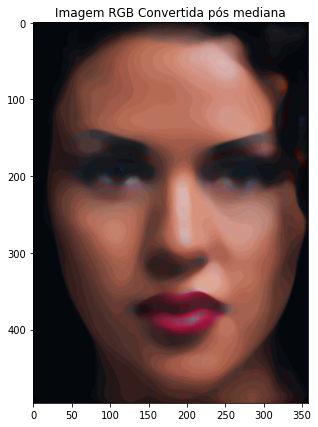

In [23]:
RGB4 = []
for linha in imagem_Mediana:    
    vetor = []
    for yiq in linha:
        y = yiq[0]
        i = yiq[1]
        q = yiq[2]

        #Cálculo da Conversão de YIQ para RGB
        r = (1.000 * y) + ( 0.956 * i) + ( 0.621 * q)
        g = (1.000 * y) + (-0.272 * i) + (-0.647 * q)
        b = (1.000 * y) + (-1.106 * i) + ( 1.703 * q)
        
        #Verificando o valor máximo
        if r > 255: 
            r = 255
        if g > 255:
            g = 255
        if b > 255:
            b = 255
        #Verificando o valor mínimo
        if r < 0.0:
            r = 0.0
        if g < 0.0:
            g = 0.0
        if b < 0.0:
            b = 0.0
        
        #Arredondando os valores de RGB
        r = int(round(r))
        g = int(round(g))
        b = int(round(b))
        yiq2 = (r,g,b)
        vetor.append(yiq2)
    RGB4.append(vetor)
    
#Mostrando imagem RGB final
plt.title("Imagem RGB Convertida pós mediana")
plt.imshow(RGB4)
plt.show()

## Questão 6.

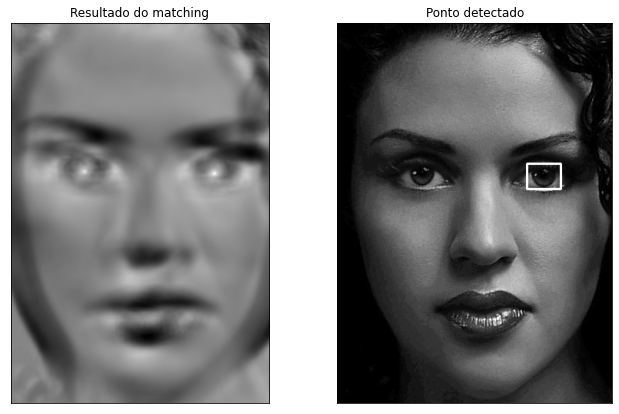

In [24]:
olho = cv2.imread('images/Woman_eye.png')
rosto = cv2.imread('images/Woman.png')

w, h = olho.shape[1], olho.shape[0]

res = cv2.matchTemplate(numpy.float32(rosto), numpy.float32(olho), cv2.TM_CCORR_NORMED)
valor_min, valor_max, left_min, left_max = cv2.minMaxLoc(res)

box = (left_max[0] + w, left_max[1] + h)

rosto = cv2.cvtColor(numpy.float32(rosto), cv2.COLOR_BGR2GRAY)

cv2.rectangle(rosto,left_max, box, 255, 2)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Resultado do matching'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(rosto,cmap = 'gray')
plt.title('Ponto detectado'), plt.xticks([]), plt.yticks([])
plt.show()

## Questão 7.

rosto: (496, 358) , olho: (33, 44)
(496, 358, 3)


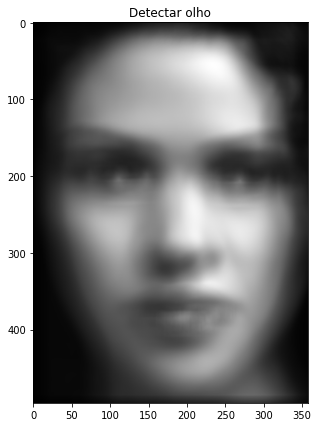

In [25]:
def correlacao(h, m, n, img, pixel_atual, offset):
    i, j = pixel_atual
    
    pivoI = int((m-1)/2)
    pivo_descerI = pivoI + 1 - m%2

    pivoJ = int((n-1)/2)
    pivo_descerJ = pivoJ + 1 - n%2
    
    i += pivoI
    j += pivoJ
    new_pixel = [0, 0, 0]

    new_pixel[0] = round(numpy.multiply(h, img[i-pivoI:i+pivo_descerI+1, j-pivoJ:j+pivo_descerJ+1, 0]).sum()) + offset
    new_pixel[1] = round(numpy.multiply(h, img[i-pivoI:i+pivo_descerI+1, j-pivoJ:j+pivo_descerJ+1, 1]).sum()) + offset
    new_pixel[2] = round(numpy.multiply(h, img[i-pivoI:i+pivo_descerI+1, j-pivoJ:j+pivo_descerJ+1, 2]).sum()) + offset
    return new_pixel
olho = cv2.imread('images/Woman_eye.png')
rosto = cv2.imread('images/Woman.png')

rosto = cv2.cvtColor(numpy.float32(rosto), cv2.COLOR_BGR2GRAY)
olho = cv2.cvtColor(numpy.float32(olho), cv2.COLOR_BGR2GRAY)

print("rosto:",numpy.shape(rosto), ", olho:", numpy.shape(olho))

rosto = numpy.repeat(rosto[:,:,numpy.newaxis], 3, axis=2)

print(numpy.shape(rosto))
detect = expansao_por_histrograma(aplica_correlacao(olho.tolist(), rosto.tolist()), 256)
plt.title("Detectar olho")
plt.imshow(detect)
plt.show()